In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
df=pd.read_csv('train 2.csv',parse_dates=True)

In [2]:
columns = list(df.columns)
display(columns)
display(df.shape)

['date', 'store', 'item', 'sales']

(913000, 4)

In [3]:
# convert the 'Date' column to datetime format
df['date']= pd.to_datetime(df['date'])
# Check the format of 'Date' column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


# Checking for misssing columns 

In [4]:
print("Missing values distribution: ")
print(df.isnull().mean())
print(df.isna().mean())

print(df.isnull().sum())
print(df.isna().sum())

print(df.isnull().sum().count())
print(df.isna().sum().count())

Missing values distribution: 
date     0.0
store    0.0
item     0.0
sales    0.0
dtype: float64
date     0.0
store    0.0
item     0.0
sales    0.0
dtype: float64
date     0
store    0
item     0
sales    0
dtype: int64
date     0
store    0
item     0
sales    0
dtype: int64
4
4


There are no missing values so we are going to procede with the column transformation 

In [5]:
df.groupby(['item','date'],as_index=False)['sales']

#Grouping data based on item and Date
Finding the Daily sale of items irrespective of the store 

As a result store column is left behind 

In [6]:
df=df.groupby(['item','date'],as_index=False)['sales'].agg({"sales":"sum"})
duplicateRows = df[df.duplicated()]
duplicateRows

,item,date,sales


In [7]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day_of_week']=df['date'].dt.day_of_week
df['day_of_year']=df['date'].dt.day_of_year
df['days_in_month']=df['date'].dt.days_in_month
df['quarter']=df['date'].dt.quarter
df['is_leap_year']=df['date'].dt.is_leap_year
df['is_month_start']=df['date'].dt.is_month_start
df['is_month_end']=df['date'].dt.is_month_end
df['is_quarter_start']=df['date'].dt.is_quarter_start
df['is_quarter_end']=df['date'].dt.is_quarter_end
df['is_year_start']=df['date'].dt.is_year_start
df['is_year_end']=df['date'].dt.is_year_end


In [8]:
#df['store']=df['store'].astype(np.int32)
df['item']=df['item'].astype(np.int32)
df['year']=df['year'].astype(np.int32)
df['sales']=df['sales'].astype(np.int32)
df['month']=df['month'].astype(np.int32)
df['day']=df['day'].astype(np.int32)
df['day_of_week']=df['day_of_week'].astype(np.int32)
df['day_of_year']=df['day_of_year'].astype(np.int32)
df['days_in_month']=df['days_in_month'].astype(np.int32)
df['quarter']=df['quarter'].astype(int)
df['is_leap_year']=df['is_leap_year'].astype(np.int32)
df['is_month_start']=df['is_month_start'].astype(np.int32)
df['is_month_end']=df['is_month_end'].astype(np.int32)
df['is_quarter_start']=df['is_quarter_start'].astype(np.int32)
df['is_quarter_end']=df['is_quarter_end'].astype(np.int32)
df['is_year_start']=df['is_year_start'].astype(np.int32)
df['is_year_end']=df['is_year_end'].astype(np.int32)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91300 entries, 0 to 91299
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   item              91300 non-null  int32         
 1   date              91300 non-null  datetime64[ns]
 2   sales             91300 non-null  int32         
 3   year              91300 non-null  int32         
 4   month             91300 non-null  int32         
 5   day               91300 non-null  int32         
 6   day_of_week       91300 non-null  int32         
 7   day_of_year       91300 non-null  int32         
 8   days_in_month     91300 non-null  int32         
 9   quarter           91300 non-null  int64         
 10  is_leap_year      91300 non-null  int32         
 11  is_month_start    91300 non-null  int32         
 12  is_month_end      91300 non-null  int32         
 13  is_quarter_start  91300 non-null  int32         
 14  is_quarter_end    9130

None

updating column names

In [9]:
columns = list(df.columns)
display(columns)
display(df.shape)

['item',
 'date',
 'sales',
 'year',
 'month',
 'day',
 'day_of_week',
 'day_of_year',
 'days_in_month',
 'quarter',
 'is_leap_year',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 'is_year_start',
 'is_year_end']

(91300, 17)

In [10]:
#copying df data to df1
df1=df.copy()

We are going to visualize the correlation between Different elements

In [11]:
corrmat = df1.corr()
corrmat

,item,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
item,1.000000e+00,-0.063190,-6.211396e-12,-1.021126e-14,4.837608e-16,4.921071e-15,4.901280e-15,5.831464e-14,-8.076171e-15,-8.609498e-16,-4.088658e-16,-2.004056e-16,1.882294e-16,-1.196922e-16,-3.364429e-16,2.165176e-16
sales,-6.318955e-02,1.000000,2.057790e-01,9.864021e-02,3.149728e-03,2.511957e-01,9.743621e-02,5.969536e-02,1.059216e-01,8.525857e-02,-6.489012e-04,3.859767e-04,-9.243344e-04,-6.147004e-03,-3.307881e-02,-2.361358e-02
year,-6.211396e-12,0.205779,1.000000e+00,-5.080291e-04,5.841665e-04,2.711688e-03,6.719189e-04,1.277295e-02,-5.231230e-04,3.538920e-01,-7.138780e-05,-7.138780e-05,-4.075678e-05,-4.075678e-05,-2.029429e-05,-2.029429e-05
month,-1.021126e-14,0.098640,-5.080291e-04,1.000000e+00,1.079604e-02,-1.475063e-03,9.965009e-01,2.360582e-01,9.713853e-01,-1.435549e-03,-1.258675e-03,-1.258675e-03,-3.123419e-02,2.979698e-02,-8.392934e-02,8.321370e-02
day,4.837608e-16,0.003150,5.841665e-04,1.079604e-02,1.000000e+00,7.725204e-04,9.404329e-02,4.573467e-02,1.252828e-02,1.650692e-03,-3.085101e-01,3.080428e-01,-1.761348e-01,1.766654e-01,-8.770396e-02,9.094561e-02
day_of_week,4.921071e-15,0.251196,2.711688e-03,-1.475063e-03,7.725204e-04,1.000000e+00,-1.414220e-03,2.938048e-03,-1.109940e-03,1.641252e-03,2.921641e-03,5.994749e-03,-7.981732e-03,-7.981732e-03,5.198722e-03,1.044050e-02
day_of_year,4.901280e-15,0.097436,6.719189e-04,9.965009e-01,9.404329e-02,-1.414220e-03,1.000000e+00,2.350938e-01,9.682308e-01,1.898655e-03,-2.698399e-02,2.447718e-02,-4.586735e-02,4.426980e-02,-9.051080e-02,9.051058e-02
days_in_month,5.831464e-14,0.059695,1.277295e-02,2.360582e-01,4.573467e-02,2.938048e-03,2.350938e-01,1.000000e+00,2.739340e-01,3.609278e-02,-5.108631e-03,-5.108631e-03,3.848654e-02,5.799833e-03,3.543976e-02,3.543976e-02
quarter,-8.076171e-15,0.105922,-5.231230e-04,9.713853e-01,1.252828e-02,-1.109940e-03,9.682308e-01,2.739340e-01,1.000000e+00,-1.478200e-03,-1.445902e-03,-1.445902e-03,-8.254952e-04,-8.254952e-04,-7.077666e-02,6.995458e-02
is_leap_year,-8.609498e-16,0.085259,3.538920e-01,-1.435549e-03,1.650692e-03,1.641252e-03,1.898655e-03,3.609278e-02,-1.478200e-03,1.000000e+00,-2.017220e-04,-2.017220e-04,-1.151673e-04,-1.151673e-04,-5.734599e-05,-5.734599e-05


<AxesSubplot:>

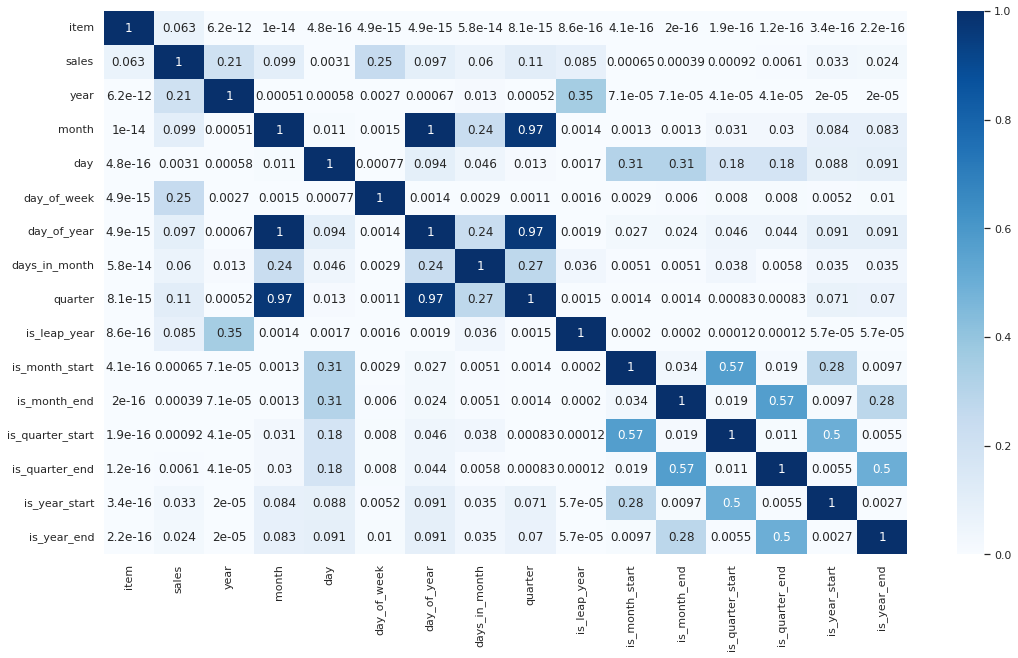

In [12]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat.abs(), annot = True,cmap='Blues')

## Our target column is sales
# Let us perform EDA on The dataset with respect to column

<AxesSubplot:xlabel='item', ylabel='sales'>

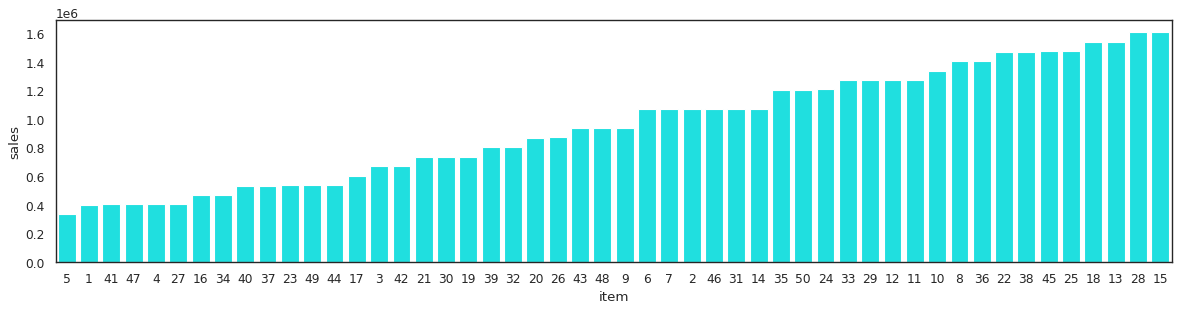

In [13]:
figure(figsize=(18, 4), dpi=80)
item_sum = df.groupby(["item"],as_index=False).agg({"sales": "sum"}).sort_values(by="sales",ascending=False)
sns.barplot(data=item_sum,x='item',y='sales',color="aqua",order=item_sum.sort_values('sales').item)

Text(0, 0.5, 'Sales/Item')

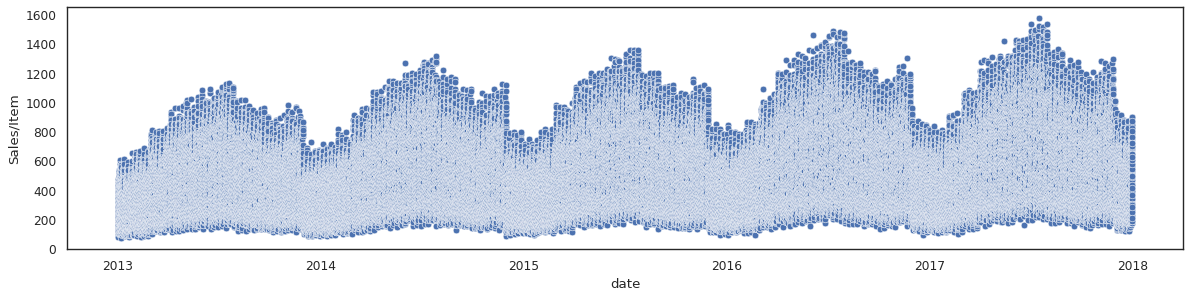

In [14]:
figure(figsize=(18, 4), dpi=80)
item_daily = df.groupby(["date","item"],as_index=False).agg({"sales":"sum"})
ax_2 = sns.scatterplot(data=item_daily,x='date',y='sales')
ax_2.set_ylabel("Sales/Item")

# From this graph we can see the data spans from 2013 till the end of 2017
Thus from Training lets take data from 2013 till end of 2016
For testing lets take the data for 2017.
Which gives us a split of 80% for training and 20% for testing 

In [15]:
df1.groupby(['item','date']).mean().reset_index()

#df1.drop('store',axis=1,inplace=True)
#df1.drop('is_month_end',axis=1,inplace=True)

,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2013-01-01,133.0,2013.0,1.0,1.0,1.0,1.0,31.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,2013-01-02,99.0,2013.0,1.0,2.0,2.0,2.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2013-01-03,127.0,2013.0,1.0,3.0,3.0,3.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2013-01-04,145.0,2013.0,1.0,4.0,4.0,4.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2013-01-05,149.0,2013.0,1.0,5.0,5.0,5.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91295,50,2017-12-27,511.0,2017.0,12.0,27.0,2.0,361.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91296,50,2017-12-28,587.0,2017.0,12.0,28.0,3.0,362.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91297,50,2017-12-29,596.0,2017.0,12.0,29.0,4.0,363.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91298,50,2017-12-30,612.0,2017.0,12.0,30.0,5.0,364.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df1

,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2013-01-01,133,2013,1,1,1,1,31,1,0,1,0,1,0,1,0
1,1,2013-01-02,99,2013,1,2,2,2,31,1,0,0,0,0,0,0,0
2,1,2013-01-03,127,2013,1,3,3,3,31,1,0,0,0,0,0,0,0
3,1,2013-01-04,145,2013,1,4,4,4,31,1,0,0,0,0,0,0,0
4,1,2013-01-05,149,2013,1,5,5,5,31,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91295,50,2017-12-27,511,2017,12,27,2,361,31,4,0,0,0,0,0,0,0
91296,50,2017-12-28,587,2017,12,28,3,362,31,4,0,0,0,0,0,0,0
91297,50,2017-12-29,596,2017,12,29,4,363,31,4,0,0,0,0,0,0,0
91298,50,2017-12-30,612,2017,12,30,5,364,31,4,0,0,0,0,0,0,0


In [17]:
#finding the number of items
num_item=len(df1['item'].unique())
#creating Training data
train_df1=df1.loc[df1['year'].isin([2013,2014,2015,2016])].reset_index()
train_df1.drop('index',axis=1,inplace=True)
train_df1

,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2013-01-01,133,2013,1,1,1,1,31,1,0,1,0,1,0,1,0
1,1,2013-01-02,99,2013,1,2,2,2,31,1,0,0,0,0,0,0,0
2,1,2013-01-03,127,2013,1,3,3,3,31,1,0,0,0,0,0,0,0
3,1,2013-01-04,145,2013,1,4,4,4,31,1,0,0,0,0,0,0,0
4,1,2013-01-05,149,2013,1,5,5,5,31,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73045,50,2016-12-27,474,2016,12,27,1,362,31,4,1,0,0,0,0,0,0
73046,50,2016-12-28,469,2016,12,28,2,363,31,4,1,0,0,0,0,0,0
73047,50,2016-12-29,566,2016,12,29,3,364,31,4,1,0,0,0,0,0,0
73048,50,2016-12-30,585,2016,12,30,4,365,31,4,1,0,0,0,0,0,0


In [18]:
#creating Testing Data

In [19]:
test_df1=df1.loc[df1['year'].isin([2017])].reset_index()
test_df1.drop('index',axis=1,inplace=True)
test_df1

,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2017-01-01,205,2017,1,1,6,1,31,1,0,1,0,1,0,1,0
1,1,2017-01-02,139,2017,1,2,0,2,31,1,0,0,0,0,0,0,0
2,1,2017-01-03,141,2017,1,3,1,3,31,1,0,0,0,0,0,0,0
3,1,2017-01-04,155,2017,1,4,2,4,31,1,0,0,0,0,0,0,0
4,1,2017-01-05,175,2017,1,5,3,5,31,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,50,2017-12-27,511,2017,12,27,2,361,31,4,0,0,0,0,0,0,0
18246,50,2017-12-28,587,2017,12,28,3,362,31,4,0,0,0,0,0,0,0
18247,50,2017-12-29,596,2017,12,29,4,363,31,4,0,0,0,0,0,0,0
18248,50,2017-12-30,612,2017,12,30,5,364,31,4,0,0,0,0,0,0,0


In [20]:
test_df1['date'] = pd.to_datetime(test_df1['date'])


# calculating sales for a duration of 3 months (90 days)for each of the respecitive days 

In [21]:
for i in range(1,num_item+1,1):
  test_df1.loc[test_df1['item'].isin([i]),'sales_3']=test_df1.loc[test_df1['item'].isin([i]),'sales'].rolling(90,center=True,min_periods=1).sum().fillna(0)
  train_df1.loc[train_df1['item'].isin([i]),'sales_3']=train_df1.loc[train_df1['item'].isin([i]),'sales'].rolling(90,center=True,min_periods=1).sum().fillna(0)

# When we observe the given set we can see that sales_3 column has the total sales for 3 months this till 31 march in all itmes the sales 3 will be zero after that each of the month we can see the values because it has crossed the 90 day window. 

# Sales_3 is our target column now

In [22]:
test_df1

,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,sales_3
0,1,2017-01-01,205,2017,1,1,6,1,31,1,0,1,0,1,0,1,0,7919.0
1,1,2017-01-02,139,2017,1,2,0,2,31,1,0,0,0,0,0,0,0,8104.0
2,1,2017-01-03,141,2017,1,3,1,3,31,1,0,0,0,0,0,0,0,8277.0
3,1,2017-01-04,155,2017,1,4,2,4,31,1,0,0,0,0,0,0,0,8456.0
4,1,2017-01-05,175,2017,1,5,3,5,31,1,0,0,0,0,0,0,0,8658.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,50,2017-12-27,511,2017,12,27,2,361,31,4,0,0,0,0,0,0,0,31899.0
18246,50,2017-12-28,587,2017,12,28,3,362,31,4,0,0,0,0,0,0,0,31002.0
18247,50,2017-12-29,596,2017,12,29,4,363,31,4,0,0,0,0,0,0,0,30365.0
18248,50,2017-12-30,612,2017,12,30,5,364,31,4,0,0,0,0,0,0,0,29664.0


In [23]:
train_df1

,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,sales_3
0,1,2013-01-01,133,2013,1,1,1,1,31,1,0,1,0,1,0,1,0,5712.0
1,1,2013-01-02,99,2013,1,2,2,2,31,1,0,0,0,0,0,0,0,5832.0
2,1,2013-01-03,127,2013,1,3,3,3,31,1,0,0,0,0,0,0,0,5986.0
3,1,2013-01-04,145,2013,1,4,4,4,31,1,0,0,0,0,0,0,0,6165.0
4,1,2013-01-05,149,2013,1,5,5,5,31,1,0,0,0,0,0,0,0,6272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73045,50,2016-12-27,474,2016,12,27,1,362,31,4,1,0,0,0,0,0,0,31165.0
73046,50,2016-12-28,469,2016,12,28,2,363,31,4,1,0,0,0,0,0,0,30298.0
73047,50,2016-12-29,566,2016,12,29,3,364,31,4,1,0,0,0,0,0,0,29380.0
73048,50,2016-12-30,585,2016,12,30,4,365,31,4,1,0,0,0,0,0,0,28785.0


# checking for any null value

In [24]:
#test_df1.fillna(0)
#train_df1.fillna(0)
print(test_df1.isna().sum())
print(train_df1.isna().sum())

item                0
date                0
sales               0
year                0
month               0
day                 0
day_of_week         0
day_of_year         0
days_in_month       0
quarter             0
is_leap_year        0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
sales_3             0
dtype: int64
item                0
date                0
sales               0
year                0
month               0
day                 0
day_of_week         0
day_of_year         0
days_in_month       0
quarter             0
is_leap_year        0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
sales_3             0
dtype: int64


In [25]:
train_df1['sales_3']=train_df1['sales_3'].astype(np.int32)
test_df1['sales_3']=test_df1['sales_3'].astype(np.int32)
df['is_year_end']=df['is_year_end'].astype(int)
X_train=pd.DataFrame()
X_test=pd.DataFrame()
y_train=pd.DataFrame()
y_test=pd.DataFrame()
y_train=train_df1['sales_3']
y_test=test_df1['sales_3']
train_df1.drop('date',axis=1,inplace=True)
test_df1.drop('date',axis=1,inplace=True)
train_df1.drop('sales_3',axis=1,inplace=True)
test_df1.drop('sales_3',axis=1,inplace=True)
train_df1.drop('sales',axis=1,inplace=True)
test_df1.drop('sales',axis=1,inplace=True)

In [26]:

X_train=train_df1.copy()
X_test=test_df1.copy()


# Linear regression

The R score is printed in to measure the model's Effectiveness 

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
import sklearn.metrics as metrics
y_pred = regressor.predict(X_test)
r2 = metrics.r2_score(y_test,y_pred)
print(r2)

0.07499024367698626


# Decition Tree

The R score is printed in to measure the model's Effectiveness 

In [28]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

In [29]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
#Predicting the test set result  
from sklearn.metrics import r2_score
y_pred= dt_regressor.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.946945023375781


# Random forest 

The R score is printed in to measure the model's Effectiveness 

In [31]:
from sklearn.ensemble import RandomForestRegressor
l=[10,50,100,200,350,500]
r2=[]
for i in l:
  rt_regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
  rt_regressor.fit(X_train,y_train)
  y_pred= rt_regressor.predict(X_test)
  print(r2_score(y_test,y_pred))

0.9491805097303568
0.9499224908354156
0.9502365470239159
0.9504755616351667
0.9503742145441717
0.9503061248552944


As we can see from Above the List of r2 score for diffent i Hyperparameter

# KNN

The R score is printed in to measure the model's Effectiveness 

In [32]:
from sklearn import preprocessing, neighbors
possible_k=[1,2,3,4,5,6,7,8,9]
r2=[]
for k in possible_k:
  knn_reg = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
  knn_reg.fit(X_train, y_train)
  y_pred= knn_reg.predict(X_test)
  print(r2_score(y_test,y_pred))

0.2754302386683837
0.2754302386683837
0.2754302386683837
0.2754302386683837
0.2754302386683837
0.2754302386683837
0.2754302386683837
0.2754302386683837
0.2754302386683837


# XG Boost

The R score is printed in to measure the model's Effectiveness 

In [34]:
import xgboost as xgb
import random
import math  
import sklearn.metrics  
from sklearn.metrics import r2_score

In [35]:
xgb = xgb.XGBRegressor(n_estimators=200, learning_rate=0.8, gamma=0, subsample=random.uniform(0.75,0.8),
                           colsample_bytree=1, max_depth=7,seed=0)

In [36]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
score1 = r2_score(y_test,y_pred)
score1

0.9671112465442352

# From the Above model we can see that XGBoost offers the best results to predict the model